# This notebook uses the UCI banknote dataset
- https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [17]:
import pandas as pd
import matplotlib.pyplot as pyplot
import itertools
from mpl_toolkits import mplot3d
from scipy.stats import zscore
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import metrics

%matplotlib inline

## Data set

In [18]:
df = pd.read_csv('../dataset/data_banknote_authentication.csv')
feats = list(df)[:-1]
df.drop_duplicates(keep='first', inplace=True, ignore_index=True, subset=feats)
neg, pos = [df.loc[df['class'] == arg] for arg in (0, 1)]
total = len(df)
print("negative: {:.0%}, positive: {:.0%}".format(len(neg) / total, len(pos) / total))
df.describe()

negative: 55%, positive: 45%


,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Feature Plots

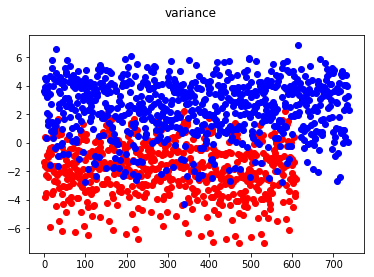

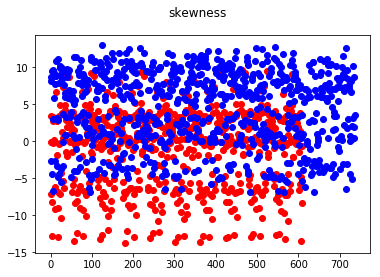

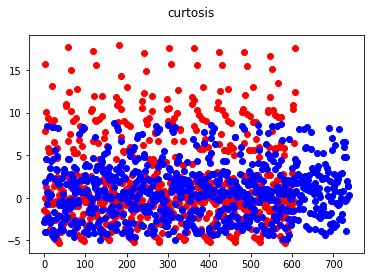

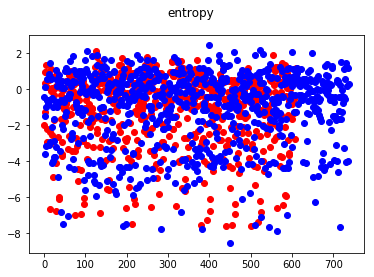

In [19]:
#One dimensional plots
for f in feats:
    pos_fs, neg_fs = list(pos[f]), list(neg[f])
    p_xs, n_xs = range(len(pos_fs)), range(len(neg_fs))
    fig, ax = pyplot.subplots()
    ax.plot(p_xs, pos_fs, 'ro', n_xs, neg_fs, 'bo')
    fig.suptitle(f)

The blue dots hang over the side due to class imbalance and inclusion of all points.

- Variance appears to be the most informative feature. 
- Skewness and curtosis show that some positive examples can be identified on the outskirts of their respective distributions.
- Entropy appears to be less informative than the other features.

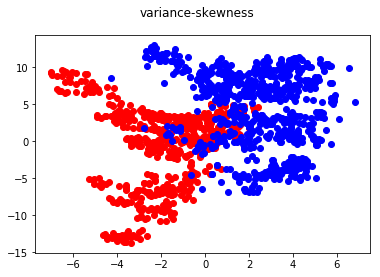

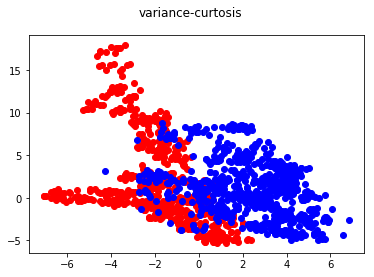

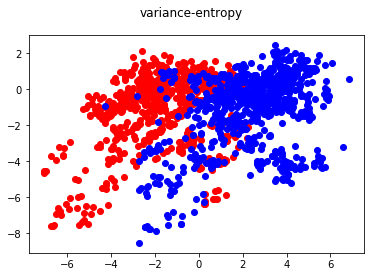

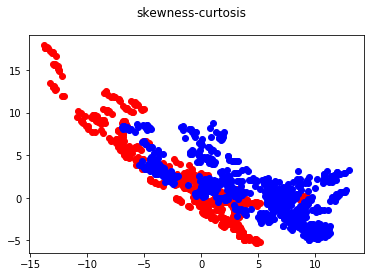

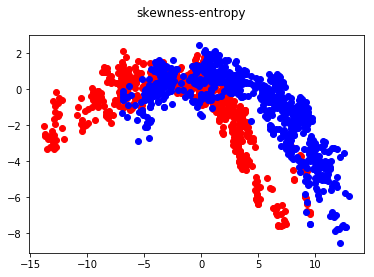

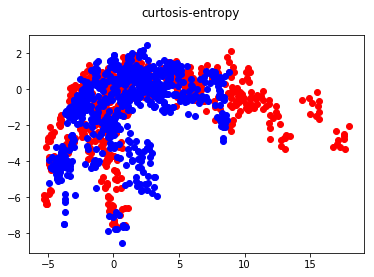

In [20]:
#Two dimensional plots
for f1, f2 in itertools.combinations(feats, 2):
    px, py = list(pos[f1]), list(pos[f2])
    nx, ny = list(neg[f1]), list(neg[f2])
    fig, ax = pyplot.subplots()
    ax.plot(px, py, 'ro', nx, ny, 'bo')
    fig.suptitle("{}-{}".format(f1, f2))
    

 - Plots with variance show formation of point clouds.
 - When coupled with variance, skewness and curtosis show isolated clouds of positive examples.
 - variance-entropy shows the potential for separability.
 - Plots without variance are not well separatred.
 - skewness-entropy and skewness-curtosis appear to show the shifts in the feature distributions.

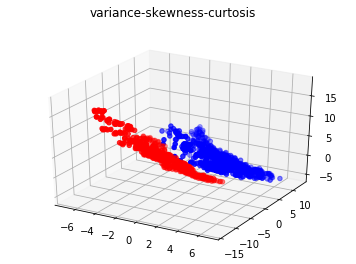

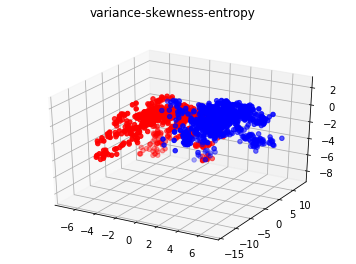

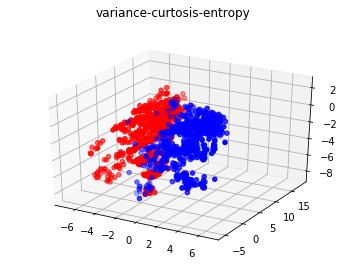

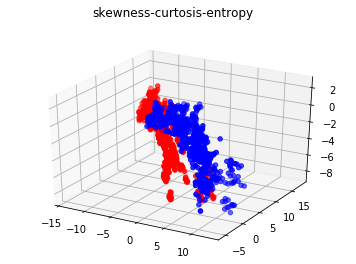

In [21]:
#Three dimensional plots
for f1, f2, f3 in itertools.combinations(feats, 3):
    pos_dp, neg_dp = [[list(df[f]) for f in (f1, f2, f3)] for df in (pos, neg)]
    fig = pyplot.figure()
    ax = pyplot.axes(projection='3d')
    for d, c, m in ((pos_dp, 'r', 'o'), (neg_dp, 'b', 'o')):
        ax.scatter3D(d[0], d[1], d[2], c=c, marker=m)
        fig.suptitle("{}-{}-{}".format(f1, f2, f3))

- variance-skewness-curtosis appears to show two nearly distinct clouds. Rotating that graph may show a few mixed points, but not many.
- The other plots show cloud formation, but they appear to be less distinct.